In [1]:
import PASCode

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# %% Prepare data
num_cells = 10000
num_genes = 5000
X = np.random.rand(num_cells, num_genes)

cell_types = np.random.randint(0, 7, num_cells)
sample_ids = np.arange(num_cells) % 20  # Ensuring unique sample_id for each phenotype
unique_sample_ids = np.unique(sample_ids)
phenotypes = np.random.randint(0, 2, len(unique_sample_ids))
phenotype_mapping = dict(zip(unique_sample_ids, phenotypes))
mapped_phenotypes = np.array([phenotype_mapping[sample_id] for sample_id in sample_ids])

meta = pd.DataFrame({'phenotype': mapped_phenotypes,
                     'cell_type': cell_types,
                     'sample_id': sample_ids})

2023-04-28 14:22:40.412684: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-28 14:22:40.453898: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 14:22:41.136215: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X

array([[0.9817248 , 0.66901408, 0.00769585, ..., 0.88926567, 0.41929858,
        0.71845764],
       [0.07622907, 0.76546586, 0.00574553, ..., 0.29633023, 0.61632333,
        0.76893949],
       [0.88243217, 0.47422514, 0.46084021, ..., 0.95378576, 0.9292847 ,
        0.69254681],
       ...,
       [0.06326993, 0.64422485, 0.70329469, ..., 0.54273989, 0.7740136 ,
        0.41799492],
       [0.27227709, 0.30493528, 0.01139021, ..., 0.96886091, 0.81110454,
        0.69725153],
       [0.55387304, 0.07035896, 0.99972778, ..., 0.3208694 , 0.42797515,
        0.87797043]])

In [3]:
meta

,phenotype,cell_type,sample_id
0,1,0,0
1,1,5,1
2,0,4,2
3,0,0,3
4,0,0,4
...,...,...,...
9995,0,4,15
9996,1,4,16
9997,1,2,17
9998,1,3,18


In [4]:
X_train, X_test, meta_train, meta_test = train_test_split(X, meta, test_size=0.33)
y_train = meta_train['phenotype'].values
y_test = meta_test['phenotype'].values

In [5]:
pascode = PASCode.PASCode()

In [9]:
pascode.train(X_train, y_train)

Pretraining...
epoch 0		 loss=0.2697
epoch 1		 loss=0.1745
epoch 2		 loss=0.0984
epoch 3		 loss=0.0917
epoch 4		 loss=0.0858
epoch 5		 loss=0.0845
epoch 6		 loss=0.0839
epoch 7		 loss=0.0836
epoch 8		 loss=0.0834
epoch 9		 loss=0.0834
Initializing cluster centroids...
Pretraining complete.

Training...
Training complete.



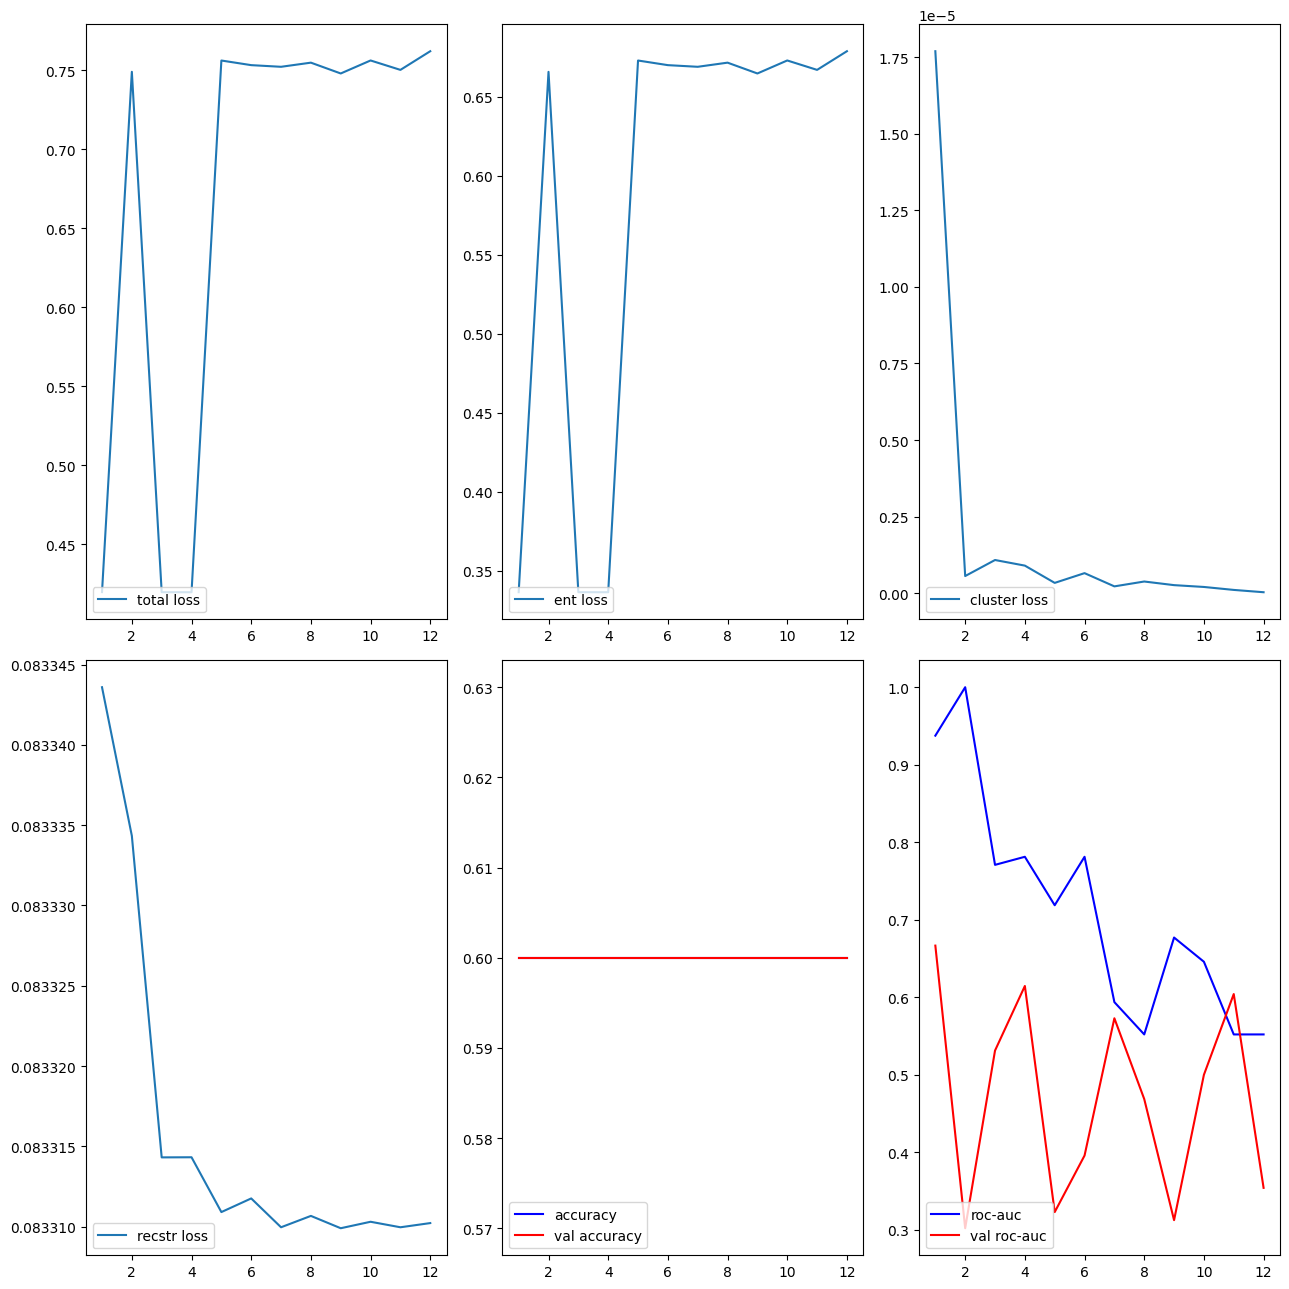

Training complete.



In [10]:
pascode.train(X_train, y_train, 
              
              evaluation=True, plot_evaluation=True, 
              X_test=X_test, y_test=y_test, 
              id_train=meta_train['sample_id'].values, 
              id_test=meta_test['sample_id'].values)

In [11]:
id_test = meta_test['sample_id'].values
X_new_test = pascode.get_donor_cluster_fraction_matrix(X_test, id_test)
X_new_test # rows are sample ids, and columns are clusters, entries are sample-cluster fractions

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.091463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.107595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.139073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.108434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.140127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.137143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.160494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
